<a href="https://colab.research.google.com/github/GulnazAleksashova/Text-recognition-on-a-driver-s-license/blob/main/driver_license_EasyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr

In [ ]:
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***Read in images***

In [ ]:
img_path = '/content/drive/My Drive/OCR/02.jpg'

In [ ]:
reader = easyocr.Reader(['en', 'ru'], gpu=False)
result = reader.readtext(img_path)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[109, 31], [195, 31], [195, 73], [109, 73]], 'RUs', 0.3183302393657019),
 ([[305, 22], [877, 22], [877, 87], [305, 87]],
  'водительское удостоверение',
  0.9308059566797848),
 ([[313, 89], [333, 89], [333, 115], [313, 115]], '1', 0.998283765600295),
 ([[371, 89], [473, 89], [473, 119], [371, 119]], 'Ильин', 0.8309912440036935),
 ([[370, 118], [442, 118], [442, 142], [370, 142]],
  'ILYIN',
  0.4131129390830143),
 ([[312, 148], [336, 148], [336, 178], [312, 178]], '2', 0.9998852047488391),
 ([[372, 148], [660, 148], [660, 180], [372, 180]],
  'МАКСиМ пАвлович',
  0.6238923748564753),
 ([[370, 176], [608, 176], [608, 202], [370, 202]],
  'MAKSIV PAVLOVICH',
  0.5684791560972887),
 ([[312, 206], [336, 206], [336, 236], [312, 236]], '3', 0.9998420539285782),
 ([[370, 206], [512, 206], [512, 238], [370, 238]],
  '31.08.1982',
  0.6681459449210571),
 ([[372, 236], [658, 236], [658, 268], [372, 268]],
  'СAРAтовская оБЛ.',
  0.20111670173642593),
 ([[370, 262], [614, 262], [614, 288], [37

***Draw results***

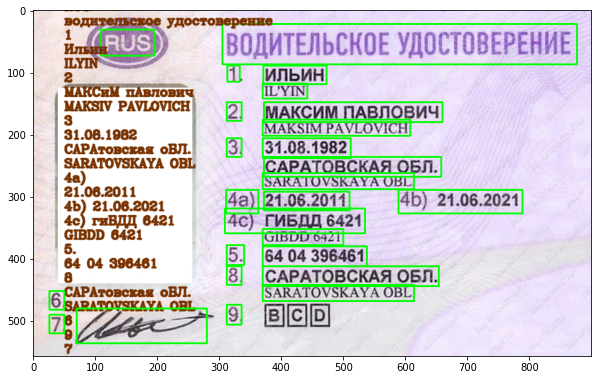

In [ ]:
img = cv2.imread(img_path)
spacer = 0
for detection in result:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    text = detection[1]
    font = cv2.FONT_HERSHEY_COMPLEX
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),2)
    img = cv2.putText(img,text,(50,spacer),font,0.65,(120,50,0),2, cv2.LINE_AA)
    spacer +=23
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()